# Synthetic chirp generator.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 4)

In [2]:
import numpy as np
import scipy
import scipy.signal
import librosa

In [3]:
# Settings.
sampling_freq = 384000
start_freq = 120000
end_freq = 40000
duration= 0.008
time_between_chirps = 0.1
max_amplitude = 0.3
noise_level = 0.002
number_of_chirps = 10
file_name = 'chirp_120_to_40_khz_TE384.wav'

In [4]:
# Create chirp.
time = np.linspace(0, duration, int(sampling_freq * duration))
chirp = scipy.signal.waveforms.chirp(time, 
                                     f0=start_freq, 
                                     f1=end_freq, 
                                     t1=duration, 
                                     method='quadratic', 
                                     vertex_zero=False)
len(chirp)

3072

In [5]:
# Apply window function.
chirp = chirp * scipy.signal.hanning(len(time)) * max_amplitude

In [6]:
# Create silent part.
silent_duration = time_between_chirps - duration
silent = np.zeros(int(sampling_freq * silent_duration))
print(silent_duration)

0.092


In [7]:
# Build sequence.
signal = silent[:int(len(silent)/2)] # Start with half lenght silence.
for index in range(number_of_chirps):
    signal = np.concatenate((signal, chirp, silent))

In [8]:
# Add noise.
signal = signal + np.random.randn(len(signal)) * noise_level

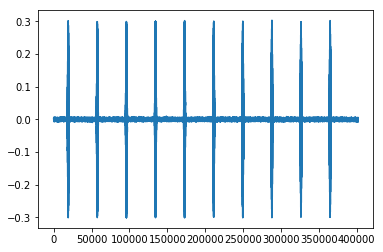

In [9]:
# Plot signal.
plt.plot(signal)
plt.show()

In [10]:
# Write to file in Time Expanded mode.
freq = int(sampling_freq / 10)
librosa.output.write_wav(file_name, signal, freq)